In [4]:
%pip install langgraph

from typing import Dict,TypedDict
from langgraph.graph import StateGraph

  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.3.24
    Uninstalling langsmith-0.3.24:
      Successfully uninstalled langsmith-0.3.24
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.51
    Uninstalling langchain-core-0.3.51:
      Successfully uninstalled langchain-core-0.3.51
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.3.23 requires langsmith<0.4,>=0.1.17, but you have langsmith 0.4.23 which is incompatible.

[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
class AgentState(TypedDict):
    message:str

In [6]:
def greet_Message(state:AgentState)->AgentState:
    """Simple Message to Greet the User"""
    state['message']="Hey "+state['message']+" How are you?"
    return state

In [7]:
graph1=StateGraph(AgentState)
graph1.add_node("greet",greet_Message)
graph1.set_entry_point("greet")
graph1.set_finish_point("greet")
app=graph1.compile()

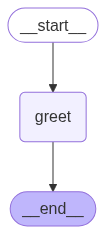

In [9]:
from IPython.display import display,Image
display(Image(app.get_graph().draw_mermaid_png()))

In [11]:
run=app.invoke({"message":"Narayan"})

In [12]:
run["message"]

'Hey Narayan How are you?'

In [13]:
run

{'message': 'Hey Narayan How are you?'}